# Email Spam Detection Project

## Importing Libraries

In [366]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import feature_engine as fe

import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
import requests
from PIL import Image
from wordcloud import WordCloud

from nltk.corpus import words

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

## Importing Data

In [281]:
df = pd.read_csv('messages.csv')

In [282]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [283]:
len(df)

2893

In [284]:
df.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [285]:
## percentage of class balance
df.label.value_counts() / len(df) * 100

0    83.373661
1    16.626339
Name: label, dtype: float64

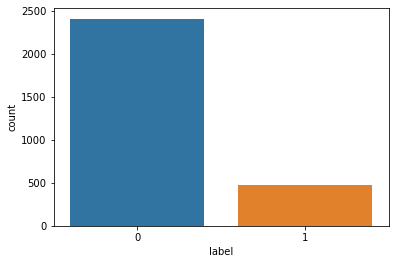

In [286]:
# plotting the class balance 
sns.countplot(df.label)

In [287]:
## checking for missing data in the dataframe

df.isna().sum()

subject    62
message     0
label       0
dtype: int64

In [288]:
# percentage of missing data
df.isna().mean()

subject    0.021431
message    0.000000
label      0.000000
dtype: float64

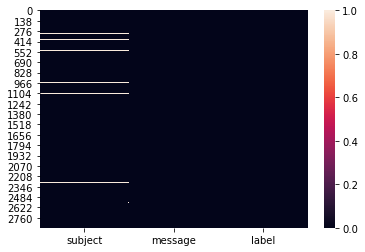

In [289]:
# heatmap for visualiing the missing data
sns.heatmap(df.isna())

* We can see that there are a few records missing the subject feature.
* As the total percentage of missing data is less than 2.2% we can very weel remove the records with the missing data.

In [290]:
## records with missing subjects
df[df.subject.isna()]

,subject,message,label
1,NaN,"lang classification grimes , joseph e . and ba...",0
13,NaN,syntax the antisymmetry of syntax richard s . ...,0
69,NaN,computational ling bengt sigurd ( ed ) compute...,0
107,NaN,"phonology & phonetics burquest , donald a . an...",0
258,NaN,phonology & phonetics leiden in last : hil pho...,0
...,...,...,...
2296,NaN,the latest issue ( 1994 n01 ) of etudes de let...,0
2309,NaN,b a r g a i n a i r f a r e s your 1 - stop tr...,1
2555,NaN,"data to : = 20 date : fri , 06 feb 1998 22 : 3...",1
2562,NaN,"epac . pt , e . carnoali @ genie . com , e . c...",1


In [291]:
## CONVERTING ALL THE WORDS TO LOWER CASE

df.subject = df.subject.str.lower()
df.message = df.message.str.lower()

In [292]:
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [294]:
df.dropna(inplace=True)

In [295]:
ref = df.message[0]
ref

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

In [296]:
# removing punctuation
refClean = re.sub(r'[^\w\s] ', '', ref)

In [297]:
refClean

"content length 3386 apple-iss research center a us 10 million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state-of the-art corpus-based n gram language models cache language models and part-of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonetics and or speech signal pro

In [298]:
# replacing all the numbers with a string 'numbrs'
refClean = re.sub("\d+", 'numbr ', refClean)

In [299]:
refClean

"content length numbr  apple-iss research center a us numbr  million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state-of the-art corpus-based n gram language models cache language models and part-of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonetics and or speech sign

In [300]:
# some more cleaning
refClean = list(filter(None,[word.strip('-|_') for word in refClean.split()]))

In [301]:
refClean

['content',
 'length',
 'numbr',
 'apple-iss',
 'research',
 'center',
 'a',
 'us',
 'numbr',
 'million',
 'joint',
 'venture',
 'between',
 'apple',
 'computer',
 'inc',
 'and',
 'the',
 'institute',
 'of',
 'systems',
 'science',
 'of',
 'the',
 'national',
 'university',
 'of',
 'singapore',
 'located',
 'in',
 'singapore',
 'is',
 'looking',
 'for',
 'a',
 'senior',
 'speech',
 'scientist',
 'the',
 'successful',
 'candidate',
 'will',
 'have',
 'research',
 'expertise',
 'in',
 'computational',
 'linguistics',
 'including',
 'natural',
 'language',
 'processing',
 'and',
 'english',
 'and',
 'chinese',
 'statistical',
 'language',
 'modeling',
 'knowledge',
 'of',
 'state-of',
 'the-art',
 'corpus-based',
 'n',
 'gram',
 'language',
 'models',
 'cache',
 'language',
 'models',
 'and',
 'part-of',
 'speech',
 'language',
 'models',
 'are',
 'required',
 'a',
 'text',
 'to',
 'speech',
 'project',
 'leader',
 'the',
 'successful',
 'candidate',
 'will',
 'have',
 'research',
 'exper

In [302]:
tkens = refClean.copy()

In [303]:
## removing all the stops words

stop_words = set(stopwords.words('english'))

cleantkens = tkens.copy()
for word in tkens:   
    if word in stop_words:
        cleantkens.remove(word)
        
print(cleantkens)

['content', 'length', 'numbr', 'apple-iss', 'research', 'center', 'us', 'numbr', 'million', 'joint', 'venture', 'apple', 'computer', 'inc', 'institute', 'systems', 'science', 'national', 'university', 'singapore', 'located', 'singapore', 'looking', 'senior', 'speech', 'scientist', 'successful', 'candidate', 'research', 'expertise', 'computational', 'linguistics', 'including', 'natural', 'language', 'processing', 'english', 'chinese', 'statistical', 'language', 'modeling', 'knowledge', 'state-of', 'the-art', 'corpus-based', 'n', 'gram', 'language', 'models', 'cache', 'language', 'models', 'part-of', 'speech', 'language', 'models', 'required', 'text', 'speech', 'project', 'leader', 'successful', 'candidate', 'research', 'expertise', 'expertise', 'two', 'following', 'areas', 'computational', 'linguistics', 'including', 'natural', 'language', 'parsing', 'lexical', 'database', 'design', 'statistical', 'language', 'modeling', 'text', 'tokenization', 'normalization', 'prosodic', 'analysis', '

In [304]:
## removing words with less 3 letters
for word in cleantkens:
    if len(word) < 4:
        cleantkens.remove(word)

print(cleantkens)

['content', 'length', 'numbr', 'apple-iss', 'research', 'center', 'numbr', 'million', 'joint', 'venture', 'apple', 'computer', 'institute', 'systems', 'science', 'national', 'university', 'singapore', 'located', 'singapore', 'looking', 'senior', 'speech', 'scientist', 'successful', 'candidate', 'research', 'expertise', 'computational', 'linguistics', 'including', 'natural', 'language', 'processing', 'english', 'chinese', 'statistical', 'language', 'modeling', 'knowledge', 'state-of', 'the-art', 'corpus-based', 'gram', 'language', 'models', 'cache', 'language', 'models', 'part-of', 'speech', 'language', 'models', 'required', 'text', 'speech', 'project', 'leader', 'successful', 'candidate', 'research', 'expertise', 'expertise', 'following', 'areas', 'computational', 'linguistics', 'including', 'natural', 'language', 'parsing', 'lexical', 'database', 'design', 'statistical', 'language', 'modeling', 'text', 'tokenization', 'normalization', 'prosodic', 'analysis', 'substantial', 'knowledge'

In [305]:
## let's encapsulate of all the basic text processing steps in a single function.

def processedData(ref):
    stop_words = set(stopwords.words('english'))
    
    refClean = re.sub(r'[^\w\s] ', '', ref)  # removing the punctuations
    
    refClean = re.sub("\d+", 'numbr ', refClean)  # replacing all the numbers with the string 'numbr'
    
    refClean = list(filter(None,[word.strip('-|_') for word in refClean.split()]))  # granular cleaning
    
    tkens = refClean
    cleantkens = tkens.copy()
    
    for word in tkens:
        if word in stop_words:
            cleantkens.remove(word)
                
            
    for word in cleantkens:
        if len(word) < 4:
            cleantkens.remove(word)
            
    return ' '.join(cleantkens)

In [306]:
msgg = df.message.apply(processedData)
test_df = pd.DataFrame(msgg)

In [307]:
# let's the the initial and the new lens of the records
test_df['lenbefore'] = df.message.apply(lambda x: len(x))
test_df['lenafter__baics_processing'] = test_df.message.apply(lambda x: len(x))

In [308]:
test_df

,message,lenbefore,lenafter__baics_processing
0,content length numbr apple-iss research center...,2856,1971
2,posting inquiry sergei atamas satamas umabnet ...,1435,1019
3,colleague researching differing degrees risk p...,324,208
4,earlier morning phone friend mine living south...,1046,576
5,content length numbr call papers best good eno...,4492,3188
...,...,...,...
2888,hello thanks stopping taken many pics made new...,262,120
2889,list owner kiddin invited join mailing list li...,2163,1166
2890,judging return post must sounded like kind sel...,1039,604
2891,gotcha separate fallacies argument n-ary compa...,2949,1793


In [309]:
## let's perform some stemming.
## We would be using proter stemmer for our application

In [310]:
def stemming_fuction(ref):
    stemmer = PorterStemmer()
    cleantkens = []
    tkens = tokenize.word_tokenize(ref)
    for word in tkens:
        cleantkens.append(stemmer.stem(word))

    return " ".join(cleantkens)

In [311]:
test_df.message = test_df.message.apply(stemming_fuction)
test_df['lenafter__stemming'] = test_df.message.apply(lambda x: len(x))

In [312]:
test_df

,message,lenbefore,lenafter__baics_processing,lenafter__stemming
0,content length numbr apple-iss research center...,2856,1971,1616
2,post inquiri sergei atama satama umabnet umd r...,1435,1019,912
3,colleagu research differ degre risk perceiv ho...,324,208,180
4,earlier morn phone friend mine live south amer...,1046,576,509
5,content length numbr call paper best good enou...,4492,3188,2733
...,...,...,...,...
2888,hello thank stop taken mani pic made new video...,262,120,105
2889,list owner kiddin invit join mail list listbot...,2163,1166,1069
2890,judg return post must sound like kind self-pro...,1039,604,513
2891,gotcha separ fallaci argument n-ari comparison...,2949,1793,1578


In [313]:
## let's perfrom lematization.
## We would be using WordNetLemmatizer

def lemmatizer_function(ref):
    lemmatizer = WordNetLemmatizer() 
    cleantkens = []
    tkens = tokenize.word_tokenize(ref)
    for word in tkens: 
        cleantkens.append(lemmatizer.lemmatize(word))

    return ' '.join(cleantkens)

In [314]:
test_df.message = test_df.message.apply(lemmatizer_function)
test_df['lenafter__lemmatizer'] = test_df.message.apply(lambda x: len(x))

In [315]:
test_df

,message,lenbefore,lenafter__baics_processing,lenafter__stemming,lenafter__lemmatizer
0,content length numbr apple-iss research center...,2856,1971,1616,1611
2,post inquiri sergei atama satama umabnet umd r...,1435,1019,912,910
3,colleagu research differ degre risk perceiv ho...,324,208,180,180
4,earlier morn phone friend mine live south amer...,1046,576,509,508
5,content length numbr call paper best good enou...,4492,3188,2733,2732
...,...,...,...,...,...
2888,hello thank stop taken mani pic made new video...,262,120,105,105
2889,list owner kiddin invit join mail list listbot...,2163,1166,1069,1069
2890,judg return post must sound like kind self-pro...,1039,604,513,513
2891,gotcha separ fallaci argument n-ari comparison...,2949,1793,1578,1571


In [316]:
## lastly, let's reving the words which makes no meaning in the english language

def non_dictionarian_words_count(ref):
    meaningfull_words = [w.lower() for w in words.words()]
    meaningfull_words.append('numbr ')
    ref_list = ref.split()
    cleanedlist = ref_list.copy()
    for element in ref_list:
        if not(element in meaningfull_words or  wordnet.synsets(element)):
            cleanedlist.remove(element)
    return ' '.join(cleanedlist)

In [317]:
test_df.message = test_df.message.apply(non_dictionarian_words_count)

In [318]:
test_df['lenafter__removing_words_with_no_meaning'] = test_df.message.apply(lambda x: len(x))

In [319]:
test_df

,message,lenbefore,lenafter__baics_processing,lenafter__stemming,lenafter__lemmatizer,lenafter__removing_words_with_no_meaning
0,content length research center million joint s...,2856,1971,1616,1611,751
2,post sergei research maryland field molecular ...,1435,1019,912,910,503
3,research differ risk hong student differ conte...,324,208,180,180,118
4,earlier morn phone friend mine live south amer...,1046,576,509,508,320
5,content length call paper best good enough wor...,4492,3188,2733,2732,1449
...,...,...,...,...,...,...
2888,hello thank stop taken mani pic made new video...,262,120,105,105,90
2889,list owner join mail list must join list blank...,2163,1166,1069,1069,553
2890,return post must sound like kind expert compos...,1039,604,513,513,274
2891,argument comparison discus recent power seek d...,2949,1793,1578,1571,846


In [329]:
test_df.columns[1:]

Index(['lenbefore', 'lenafter__baics_processing', 'lenafter__stemming',
       'lenafter__lemmatizer', 'lenafter__removing_words_with_no_meaning'],
      dtype='object')

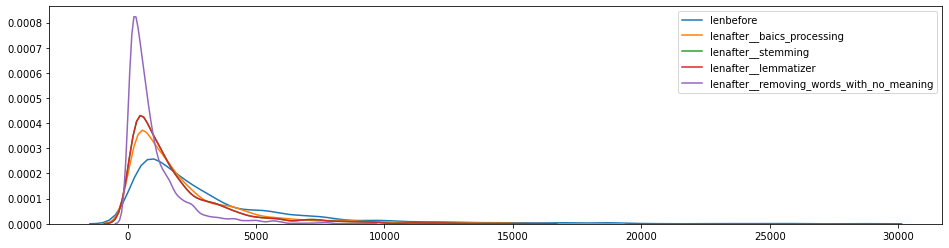

In [335]:
plt.figure(figsize=(16,4))
for col in test_df.columns[1:]:
    sns.kdeplot(test_df[col])

In [361]:
test_df.head(1)

,message,lenbefore,lenafter__baics_processing,lenafter__stemming,lenafter__lemmatizer,lenafter__removing_words_with_no_meaning,label
0,content length research center million joint s...,2856,1971,1616,1611,751,0


In [362]:
test_df['label'] = df.label

In [363]:
# Message distribution BEFORE cleaning

def plot_distributions(df,col):
    f,ax = plt.subplots(1,2,figsize = (15,8))

    sns.distplot(df[df['label']==1][col],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

    ax[0].set_xlabel('Spam sms length')
    ax[0].legend()

    sns.distplot(df[df['label']==0][col],bins=20,ax=ax[1],label='ham messages distribution')
    ax[1].set_xlabel('ham sms length')
    ax[1].legend()

    plt.show()

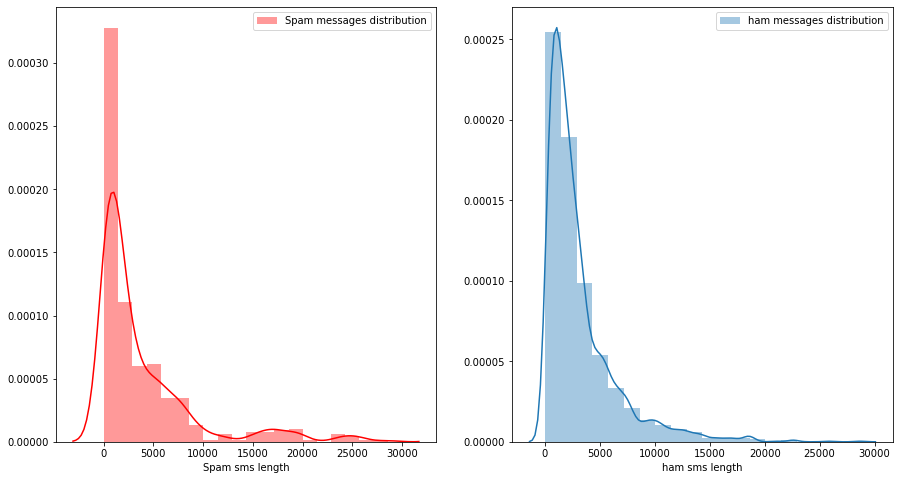

In [364]:
plot_distributions(test_df,'lenbefore')

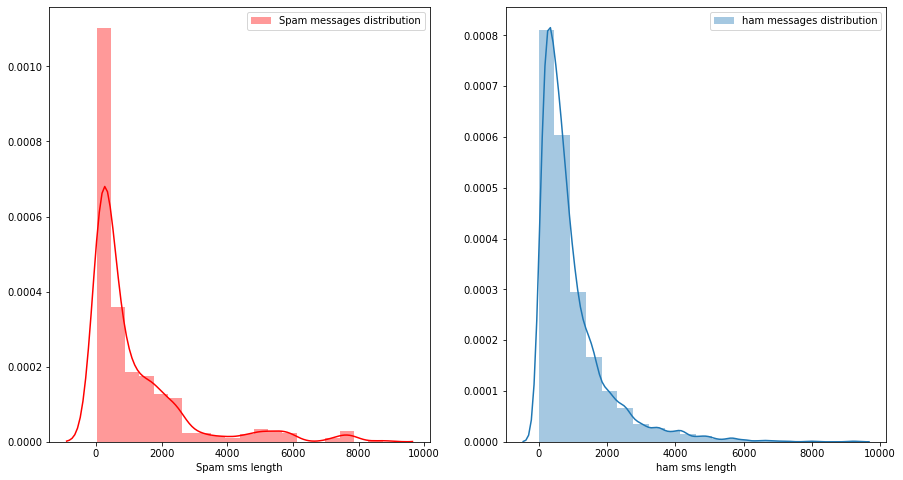

In [365]:
plot_distributions(test_df,'lenafter__removing_words_with_no_meaning')

## Creating word dictionary

In [337]:
test_df.tail()

,message,lenbefore,lenafter__baics_processing,lenafter__stemming,lenafter__lemmatizer,lenafter__removing_words_with_no_meaning
2888,hello thank stop taken mani pic made new video...,262,120,105,105,90
2889,list owner join mail list must join list blank...,2163,1166,1069,1069,553
2890,return post must sound like kind expert compos...,1039,604,513,513,274
2891,argument comparison discus recent power seek d...,2949,1793,1578,1571,846
2892,hello work concern toward america american eng...,700,399,367,366,250


In [339]:
def word_dict(col, countvect):
    terms_doc = countvect.fit_transform(col)
    word_list = countvect.get_feature_names();    
    count_list = terms_doc.toarray().sum(axis=0)    
    return dict(zip(word_list,count_list))

In [340]:
message_vocab  = word_dict(test_df.message,CountVectorizer())

In [341]:
message_vocab

{'aa': 5,
 'aaa': 25,
 'aachen': 11,
 'aal': 2,
 'aalborg': 7,
 'aaron': 15,
 'ab': 6,
 'aback': 1,
 'abandon': 15,
 'abb': 1,
 'abba': 6,
 'abc': 2,
 'abdomen': 1,
 'abduct': 14,
 'abe': 2,
 'abel': 5,
 'aberdeen': 9,
 'abigail': 2,
 'ablaut': 4,
 'abler': 1,
 'aboard': 3,
 'abolish': 1,
 'abord': 2,
 'abound': 4,
 'about': 1,
 'abox': 1,
 'abraham': 13,
 'abram': 1,
 'abreast': 1,
 'abroad': 24,
 'abrook': 1,
 'absalom': 1,
 'abscissa': 1,
 'absent': 12,
 'absolutist': 1,
 'absorb': 4,
 'absorpt': 3,
 'abstract': 1713,
 'absurd': 5,
 'abu': 2,
 'abyss': 1,
 'ac': 312,
 'acacia': 3,
 'academia': 33,
 'academician': 4,
 'acc': 3,
 'accent': 126,
 'accept': 1017,
 'access': 458,
 'accident': 11,
 'acclaim': 6,
 'accomplish': 32,
 'accord': 161,
 'account': 561,
 'accra': 1,
 'accredit': 6,
 'accustom': 2,
 'acer': 2,
 'ach': 4,
 'acid': 6,
 'acquaint': 18,
 'acquist': 2,
 'acrobat': 5,
 'acronym': 6,
 'across': 181,
 'act': 66,
 'acta': 5,
 'action': 186,
 'activist': 7,
 'acton': 6,
 '

## Word Cloud

In [357]:
# creating a word cloud

def create_word_cloud(df_wc,col_name, clabel):

    pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

    spams = df_wc[df_wc.label == clabel][col_name]

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    mask = pic, 
                    min_font_size = 10).generate(' '.join(spams))

    plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

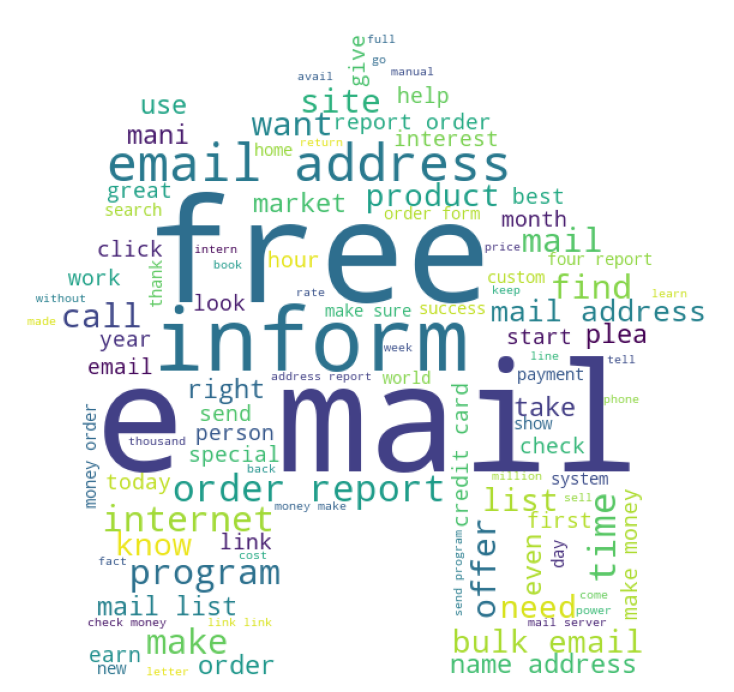

In [358]:
# spam message cloud
create_word_cloud(test_df,col_name='message',clabel=1)

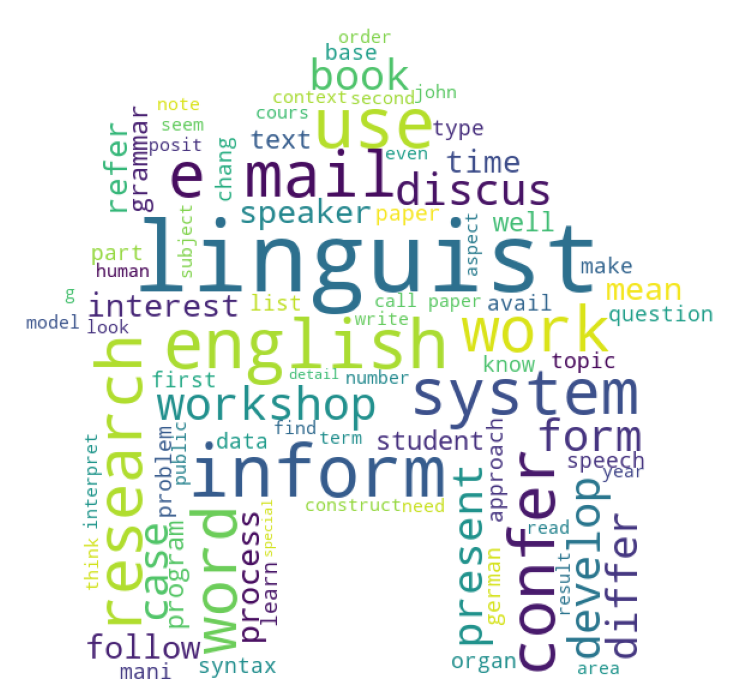

In [359]:
 # ham message wordcloud
create_word_cloud(test_df,col_name='message',clabel=0)

######################################################################

### `The following code preprocess the data and builds the model`

######################################################################

In [193]:
df_raw = pd.read_csv('messages.csv')

In [194]:
df_raw.dropna(inplace=True)

In [195]:
df_raw

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


## Preprocessing 

In [196]:
    def processedData(ref):
        stop_words = set(stopwords.words('english'))

        refClean = re.sub(r'[^\w\s] ', '', ref)  # removing the punctuations

        refClean = re.sub("\d+", 'numbr ', refClean)  # replacing all the numbers with the string 'numbr'

        refClean = list(filter(None,[word.strip('-|_') for word in refClean.split()]))  # granular cleaning

        tkens = refClean
        cleantkens = tkens.copy()

        for word in tkens:
            if word in stop_words:
                cleantkens.remove(word)


        for word in cleantkens:
            if len(word.strip()) < 4:
                cleantkens.remove(word)

        return ' '.join(cleantkens)

In [197]:
    # stemming (Porter)
    
    def stemming_fuction(ref):
        stemmer = PorterStemmer()
        cleantkens = []
        tkens = tokenize.word_tokenize(ref)
        for word in tkens:
            cleantkens.append(stemmer.stem(word))
        
        return " ".join(cleantkens)

In [198]:
    # lemmatizing (WordNet)

    def lemmatizer_function(ref):
        lemmatizer = WordNetLemmatizer() 
        cleantkens = []
        tkens = tokenize.word_tokenize(ref)
        for word in tkens: 
            cleantkens.append(lemmatizer.lemmatize(word))

        return ' '.join(cleantkens)

In [199]:
    def non_dictionarian_words_count(ref):
        meaningfull_words = [w.lower() for w in words.words()]
        meaningfull_words.append('numbr ')
        ref_list = ref.split()
        cleanedlist = ref_list.copy()
        for element in ref_list:
            if not(element in meaningfull_words or  wordnet.synsets(element)):
                cleanedlist.remove(element)
        return ' '.join(cleanedlist)

In [200]:
    def vectorizer(df):
        vectorizer_m = TfidfVectorizer()
        vectorizer_s = TfidfVectorizer()

        message_sparse = vectorizer_m.fit_transform(df.message).todense()
        subject_sparse = vectorizer_s.fit_transform(df.subject).todense()

        df_vectred = pd.DataFrame(np.hstack([subject_sparse,message_sparse]),columns=['sub_'+element for element in vectorizer_s.get_feature_names()] + ['msg_'+element for element in vectorizer_m.get_feature_names()])

        #df_vectred['label'] = df.reset_index().label
        return df_vectred

In [201]:
def text_processor(df):
    df_copy = df.copy()
        
    df_copy.subject = df.subject.apply(processedData)
    df_copy.subject = df_copy.subject.apply(stemming_fuction)
    df_copy.subject = df_copy.subject.apply(lemmatizer_function)
    df_copy.subject = df_copy.subject.apply(non_dictionarian_words_count)

        
        
    df_copy.message = df.message.apply(processedData)
    df_copy.message = df_copy.message.apply(stemming_fuction)
    df_copy.message = df_copy.message.apply(lemmatizer_function)
    df_copy.message = df_copy.message.apply(non_dictionarian_words_count)
    
    return vectorizer(df_copy)

In [204]:
final_data = text_processor(df_raw)

In [205]:
final_data.to_csv('final_data.csv')

In [206]:
final_data

,sub_aaa,sub_abstract,sub_academia,sub_accent,sub_accept,sub_access,sub_acquist,sub_across,sub_act,sub_action,...,msg_zone,msg_zoologist,msg_zoom,msg_zoquean,msg_zorro,msg_zu,msg_zukerman,msg_zulu,msg_zurich,msg_zweig
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.863257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2827,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2828,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2829,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train test split

In [217]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,random_state=42)

In [218]:
X_train.shape,y_train.shape

((2123, 11753), (2123,))

In [219]:
X_test.shape,y_test.shape

((708, 11753), (708,))

## Model Building

In [ ]:
model = MultinomialNB()

In [220]:
model.fit(X_train,y_train)

MultinomialNB()

In [221]:
model.score(X_train,y_train)

0.9755063589260481

In [222]:
model.score(X_test,y_test)

0.961864406779661

## Model Evaulation

In [224]:
## classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       584
           1       1.00      0.78      0.88       124

    accuracy                           0.96       708
   macro avg       0.98      0.89      0.93       708
weighted avg       0.96      0.96      0.96       708



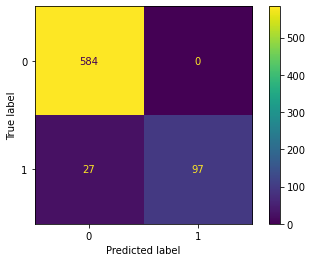

In [226]:
plot_confusion_matrix(model,X_test,y_test)